In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


billionaire_data = pd.read_csv('billionaires_statistics_dataset.csv')
billionaire_data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
billionaire_data.shape

(2640, 35)

In [5]:
billionaire_data.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

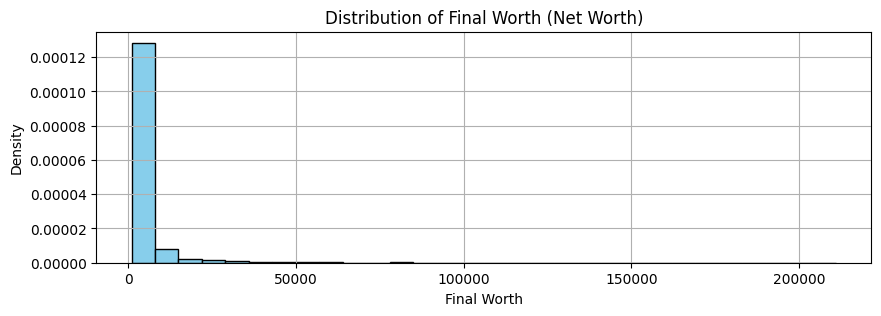

In [162]:
plt.figure(figsize=(10, 3))
plt.hist(billionaire_data['finalWorth'], bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Worth (Net Worth)')
plt.xlabel('Final Worth')
plt.ylabel('Density')
plt.grid(True)
plt.show()

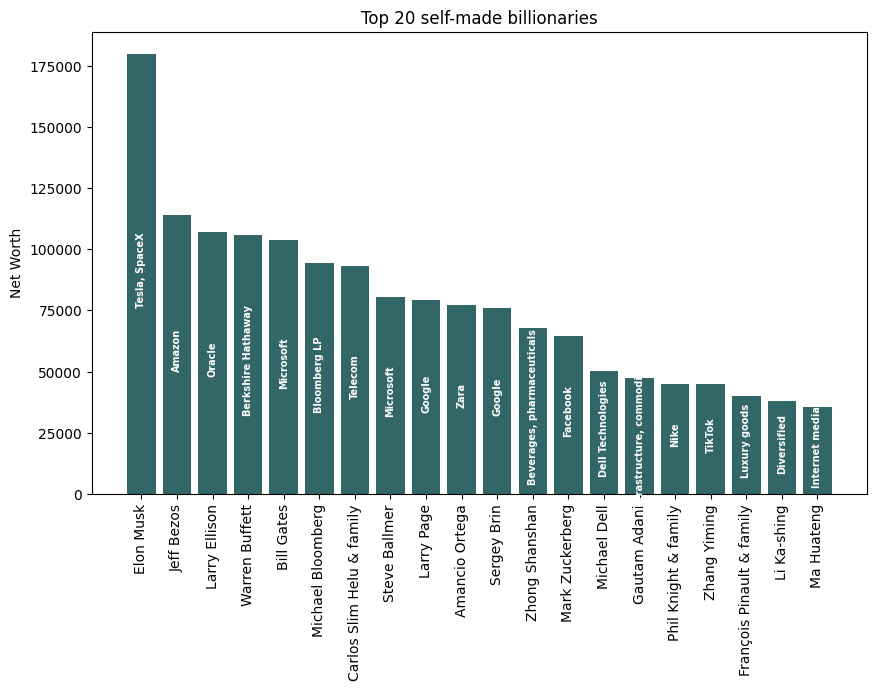

In [164]:
self_made_billionaries = billionaire_data[billionaire_data['selfMade']].sort_values(by = 'finalWorth', ascending=False).head(20)
plt.figure(figsize=(10, 6))
bars = plt.bar(self_made_billionaries['personName'], self_made_billionaries['finalWorth'], color=(0.2, 0.4, 0.4))
plt.xticks(rotation=90)
plt.title('Top 20 self-made billionaries')
plt.ylabel('Net Worth')
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    source = self_made_billionaries.iloc[i]['source']
    plt.annotate(source,
                 xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='center',
                 fontsize=7,
                 color='white',
                 fontweight='bold',
                 rotation=90)
plt.show()

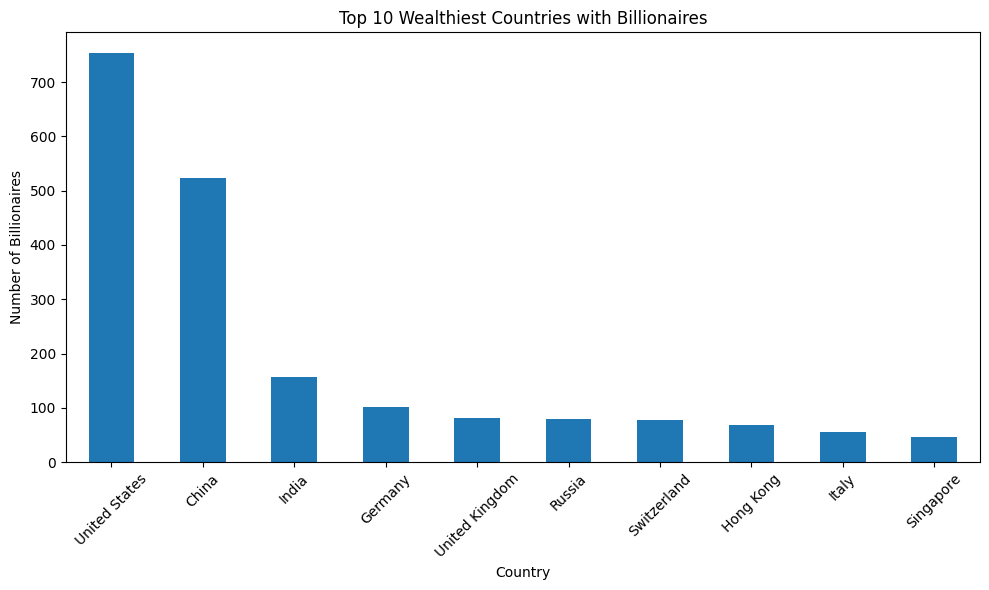

In [152]:
top_countries = billionaire_data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Wealthiest Countries with Billionaires')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

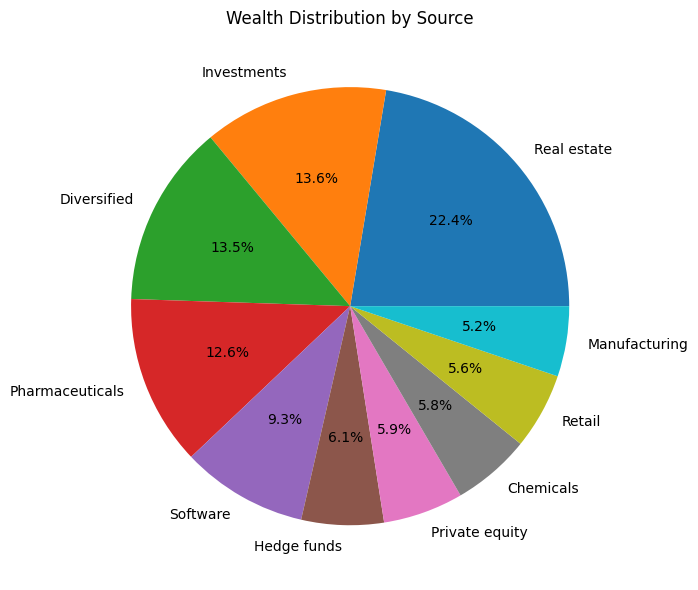

In [153]:
wealth_sources = billionaire_data['source'].value_counts().head(10)
plt.figure(figsize=(10, 6))
wealth_sources.plot(kind='pie', autopct='%1.1f%%')
plt.title('Wealth Distribution by Source')
plt.ylabel('')
plt.tight_layout()
plt.show()

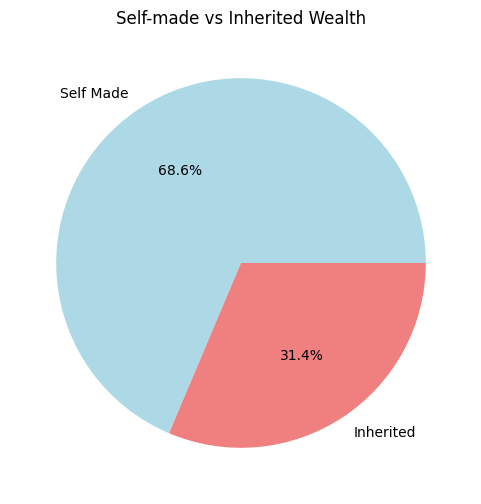

In [154]:
self_made_counts = billionaire_data['selfMade'].value_counts()
plt.figure(figsize=(6, 6))
self_made_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], labels=["Self Made", "Inherited"])
plt.title('Self-made vs Inherited Wealth')
plt.ylabel('')
plt.show()

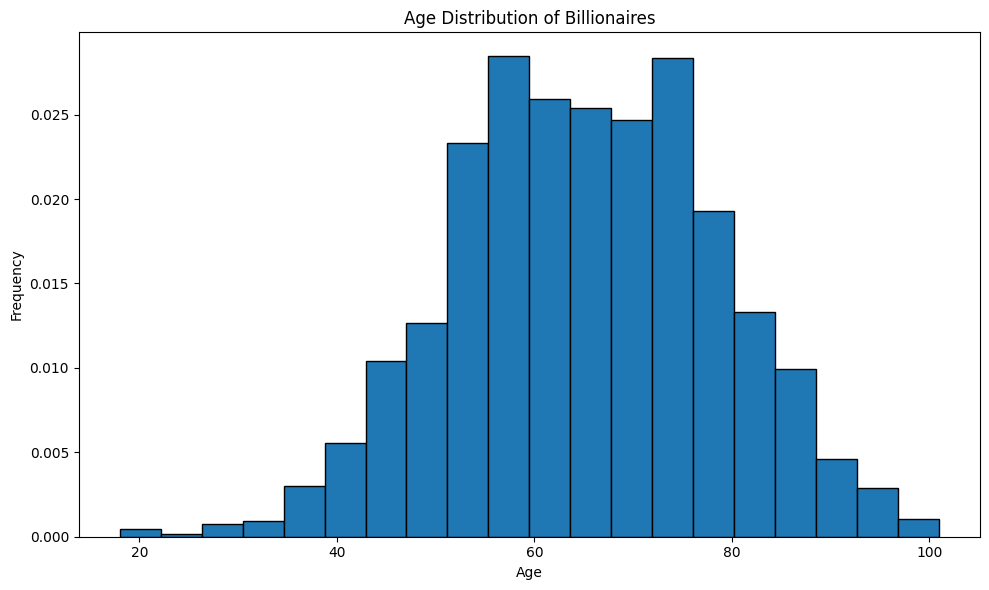

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(billionaire_data['age'].dropna(), bins=20, edgecolor='black', density=True)
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
# Hmmmm, seems that age has a normal distribution. Let's find parameters !!!
print("Mean:", round(billionaire_data['age'].mean(),2))
print("Standard deviation:", round(billionaire_data['age'].std(), 2))

Mean: 65.14
Standard deviation: 13.26


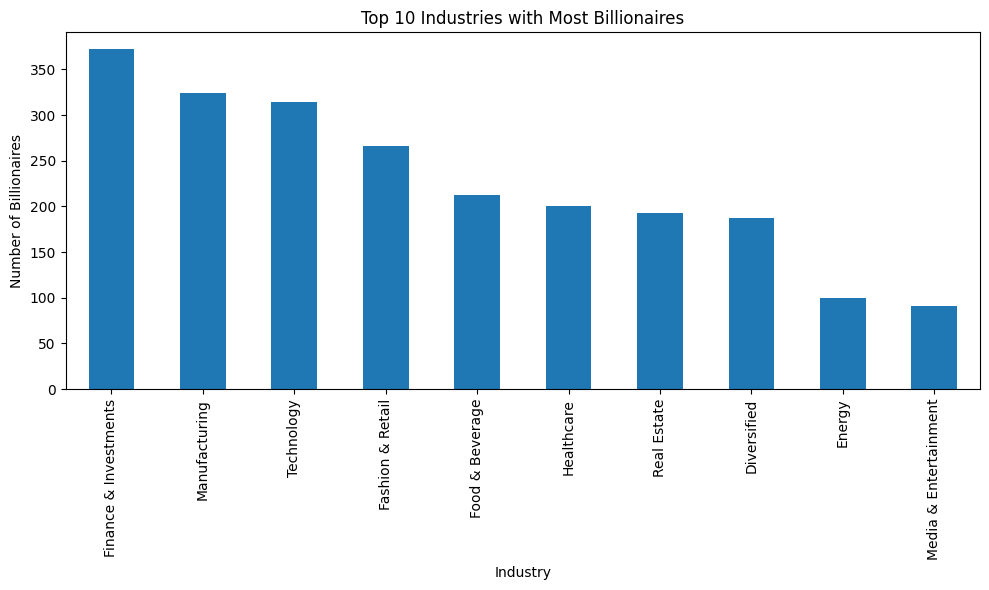

In [10]:
top_industries = billionaire_data['industries'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_industries.plot(kind='bar')
plt.title('Top 10 Industries with Most Billionaires')
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.tight_layout()
plt.show()

In [21]:
# making gdp_country column numeric
billionaire_data['gdp_country'] = billionaire_data['gdp_country'].apply(lambda x: pd.to_numeric(x.split('$')[-1].strip().replace(',', '')) if isinstance(x, str) else x)

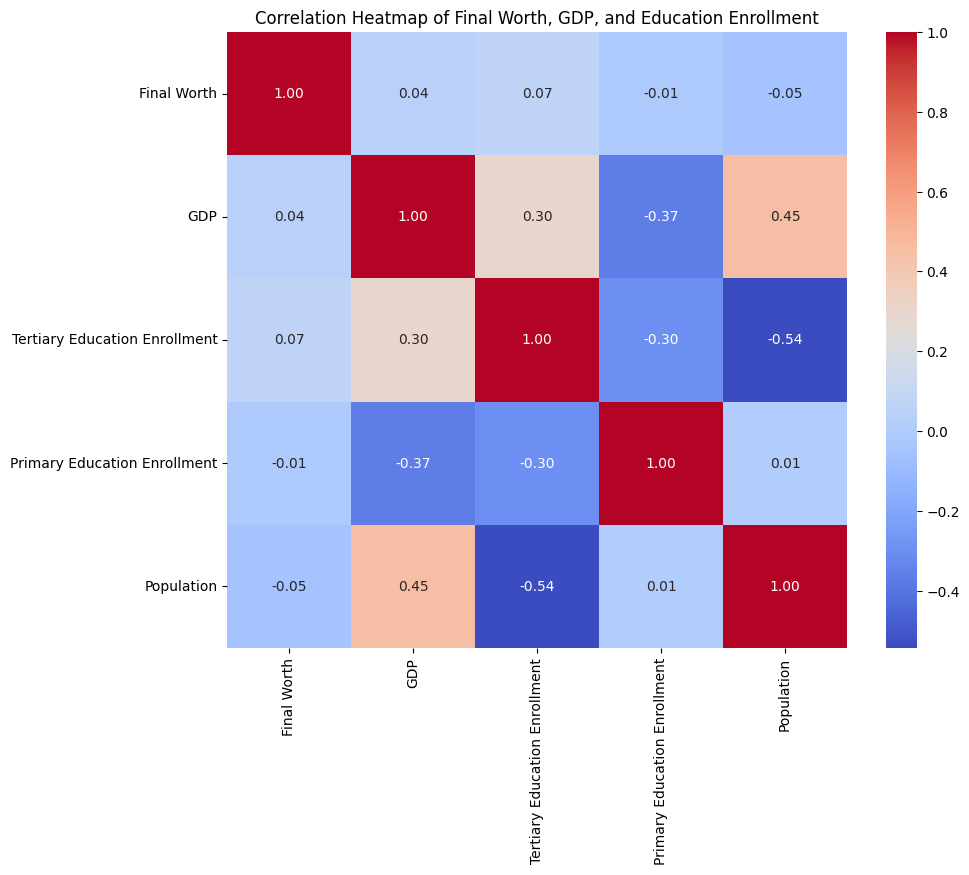

In [53]:
columns = ['finalWorth', 'gdp_country', 'gross_tertiary_education_enrollment', 
           'gross_primary_education_enrollment_country', 'population_country']
subset_df = billionaire_data[columns]
subset_df.columns = ['Final Worth', 'GDP', 'Tertiary Education Enrollment', 'Primary Education Enrollment', 'Population']
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Final Worth, GDP, and Education Enrollment')
plt.show()

# It is very surprising to me that there is no correlation between these features and net worth.